In [1]:
import pandas as pd

df = pd.read_json('DubNation_2022_11_03_10ktweet_cleaned.json')
df.head()

,Date,User,Tweet,clean_text
0,2022-11-02 23:57:58,ColdPieceCITY,RT @ColdPieceCITY: Steph = Mount Rushmore ?\n#...,steph mount rushmore
1,2022-11-02 23:56:40,HermanKosta,"RT @warriors: #DubNation, just a reminder that...",reminder text warrior get ready vote
2,2022-11-02 23:56:28,ColdPieceCITY,RT @ColdPieceCITY: - Led Warriors to their fir...,lead warrior first championship year lead warr...
3,2022-11-02 23:55:59,Sethoole,RT @warriors_bra: 🏀 GOLDEN STATE WARRIORS | 20...,golden state warrior
4,2022-11-02 23:54:23,TravelingBeee,RT @TravelingBeee: We ok with Green leaving? #...,ok green leave


In [2]:
import numpy as np
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['clean_text'].apply(pol)
df['subjectivity'] = df['clean_text'].apply(sub)
df

,Date,User,Tweet,clean_text,polarity,subjectivity
0,2022-11-02 23:57:58,ColdPieceCITY,RT @ColdPieceCITY: Steph = Mount Rushmore ?\n#...,steph mount rushmore,0.000000,0.000000
1,2022-11-02 23:56:40,HermanKosta,"RT @warriors: #DubNation, just a reminder that...",reminder text warrior get ready vote,0.200000,0.500000
2,2022-11-02 23:56:28,ColdPieceCITY,RT @ColdPieceCITY: - Led Warriors to their fir...,lead warrior first championship year lead warr...,0.416667,0.236752
3,2022-11-02 23:55:59,Sethoole,RT @warriors_bra: 🏀 GOLDEN STATE WARRIORS | 20...,golden state warrior,0.300000,0.500000
4,2022-11-02 23:54:23,TravelingBeee,RT @TravelingBeee: We ok with Green leaving? #...,ok green leave,0.150000,0.400000
...,...,...,...,...,...,...
9995,2022-10-28 03:57:53,WarriorsGameDay,RT @GigiSibale: Jamychal Green. What an additi...,jamychal green addition,-0.200000,0.300000
9996,2022-10-28 03:57:53,OnBallSteph,RT @KylenMills: Big minutes for JaMychal Green...,big minute jamychal green look good playing so...,0.050000,0.292857
9997,2022-10-28 03:57:47,SSBrandon,Dead Poole wanting to co-opt a lead role &amp;...,dead poole want co opt lead role amp wiggins t...,-0.025000,0.350000
9998,2022-10-28 03:57:47,WarriorsGameDay,RT @saucypeeps: I’m ok with this Ty Jerome kid...,ok ty jerome kid,0.500000,0.500000


In [3]:
import numpy as np

df["sentiment_score"] = df["Tweet"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["sentiment"] = np.select([df["sentiment_score"] < 0, df["sentiment_score"] == 0, df["sentiment_score"] > 0],
                           ['negative', 'neutral', 'positive'])

In [4]:
positive = df[df['sentiment'] == 'positive'].shape[0]
negative = df[df['sentiment'] == 'negative'].shape[0]
neutral = df[df['sentiment'] == 'neutral'].shape[0]

print('Pozitív hangulatú mondatok száma: ', positive)
print('Negatív hangulatú mondatok száma: ', negative)
print('Neutrális hangulatú mondatok száma: ', neutral)

Pozitív hangulatú mondatok száma:  3606
Negatív hangulatú mondatok száma:  2057
Neutrális hangulatú mondatok száma:  4337


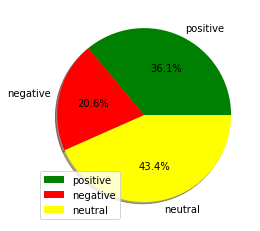

In [5]:
import matplotlib.pyplot as plt

ratings = ['positive', 'negative', 'neutral']
slices = [positive, negative, neutral]
colors = ['green', 'red', 'yellow']

plt.pie(slices, labels=ratings, colors=colors, shadow=True, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

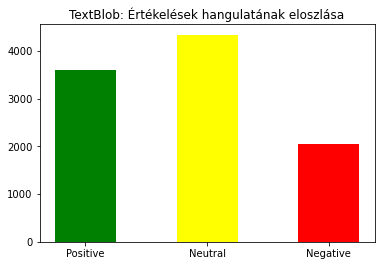

In [6]:
plt.bar([1, 2, 3], [positive, neutral, negative], tick_label = ['Positive', 'Neutral', 'Negative'], width=0.5, color=['green', 'yellow', 'red'])
plt.title('TextBlob: Értékelések hangulatának eloszlása')
plt.show()

In [7]:
positive = df[df['sentiment'] == 'positive'].shape[0]
negative = df[df['sentiment'] == 'negative'].shape[0]

print('Pozitív hangulatú mondatok száma: ', positive)
print('Negatív hangulatú mondatok száma: ', negative)

Pozitív hangulatú mondatok száma:  3606
Negatív hangulatú mondatok száma:  2057


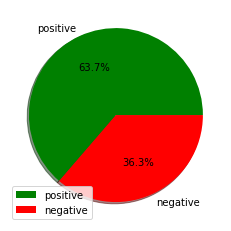

In [8]:
ratings = ['positive', 'negative']
slices = [positive, negative]
colors = ['green', 'red']

plt.pie(slices, labels=ratings, colors=colors, shadow=True, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

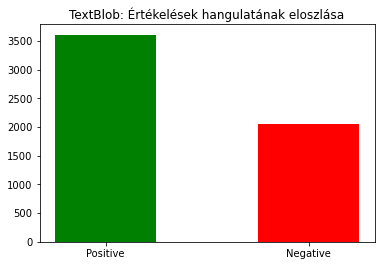

In [9]:
plt.bar([1, 2], [positive, negative], tick_label = ['Positive', 'Negative'], width=0.5, color=['green', 'red'])
plt.title('TextBlob: Értékelések hangulatának eloszlása')
plt.show()